In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize

In [2]:
#Loading the datasets

df = pd.read_csv('messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
#Deleting duplicate records

df.drop_duplicates(inplace = True)
print('=== Information of the dataset == \n\n',df.info())
print('\n\n === Shape of the Dataset ==>',df.shape)
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2876 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2814 non-null   object
 1   message  2876 non-null   object
 2   label    2876 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 89.9+ KB
=== Information of the dataset == 

 None


 === Shape of the Dataset ==> (2876, 3)


,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0


In [4]:
# Lets check the sentiment column once.0
df['label'].value_counts()

0    2408
1     468
Name: label, dtype: int64

In [5]:
#Filled up missing values with NA for processing the data

df['subject'].replace({np.nan:'NA'}, inplace = True)

In [6]:
#We are now tokenizing sentences from comments for futher processing

df['message sentences'] = df['message'].apply(sent_tokenize).apply(','.join)
df['subject sentences'] = df['subject'].apply(sent_tokenize).apply(','.join)
df.head()

,subject,message,label,message sentences,subject sentences
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,content - length : 3386 apple-iss research cen...,job posting - apple-iss research center
1,NA,"lang classification grimes , joseph e . and ba...",0,"lang classification grimes , joseph e .,and ba...",NA
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,i am posting this inquiry for sergei atamas ( ...,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,a colleague and i are researching the differin...,risk
4,request book information,earlier this morning i was on the phone with a...,0,earlier this morning i was on the phone with a...,request book information


In [7]:
#Let's remove the first columns

df.drop(['subject','message'], axis =1, inplace = True)
df.head()

,label,message sentences,subject sentences
0,0,content - length : 3386 apple-iss research cen...,job posting - apple-iss research center
1,0,"lang classification grimes , joseph e .,and ba...",NA
2,0,i am posting this inquiry for sergei atamas ( ...,query : letter frequencies for text identifica...
3,0,a colleague and i are researching the differin...,risk
4,0,earlier this morning i was on the phone with a...,request book information


In [8]:
#Performing word tokenization

df['subject Words'] = df['subject sentences'].str.lower().apply(word_tokenize)
df['message Words'] = df['message sentences'].str.lower().apply(word_tokenize)
df.head()

,label,message sentences,subject sentences,subject Words,message Words
0,0,content - length : 3386 apple-iss research cen...,job posting - apple-iss research center,"[job, posting, -, apple-iss, research, center]","[content, -, length, :, 3386, apple-iss, resea..."
1,0,"lang classification grimes , joseph e .,and ba...",NA,[na],"[lang, classification, grimes, ,, joseph, e, ...."
2,0,i am posting this inquiry for sergei atamas ( ...,query : letter frequencies for text identifica...,"[query, :, letter, frequencies, for, text, ide...","[i, am, posting, this, inquiry, for, sergei, a..."
3,0,a colleague and i are researching the differin...,risk,[risk],"[a, colleague, and, i, are, researching, the, ..."
4,0,earlier this morning i was on the phone with a...,request book information,"[request, book, information]","[earlier, this, morning, i, was, on, the, phon..."


In [9]:
#importing stopwords

from nltk.corpus import stopwords 
new_stopwords_list = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin','br','n','t','e','end','see','go','s',
                                                       'to','ca','n','ure','he','z','!','@','#','$','%','^','&','*','(',')'])

In [10]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

def lem(text):
    return[lemma.lemmatize(w) for w in text if w not in new_stopwords_list]

In [11]:
#Applied Lemmatization

df['Cleaned Messages']= df['subject Words'].apply(lem).apply(','.join)
df['Cleaned Subjects']= df['message Words'].apply(lem).apply(','.join)

In [12]:
df.head()

,label,message sentences,subject sentences,subject Words,message Words,Cleaned Messages,Cleaned Subjects
0,0,content - length : 3386 apple-iss research cen...,job posting - apple-iss research center,"[job, posting, -, apple-iss, research, center]","[content, -, length, :, 3386, apple-iss, resea...","job,posting,-,apple-iss,research,center","content,-,length,:,3386,apple-iss,research,cen..."
1,0,"lang classification grimes , joseph e .,and ba...",NA,[na],"[lang, classification, grimes, ,, joseph, e, ....",na,"lang,classification,grime,,,joseph,.,,,barbara..."
2,0,i am posting this inquiry for sergei atamas ( ...,query : letter frequencies for text identifica...,"[query, :, letter, frequencies, for, text, ide...","[i, am, posting, this, inquiry, for, sergei, a...","query,:,letter,frequency,text,identification","posting,inquiry,sergei,atamas,satamas,umabnet,..."
3,0,a colleague and i are researching the differin...,risk,[risk],"[a, colleague, and, i, are, researching, the, ...",risk,"colleague,researching,differing,degree,risk,pe..."
4,0,earlier this morning i was on the phone with a...,request book information,"[request, book, information]","[earlier, this, morning, i, was, on, the, phon...","request,book,information","earlier,morning,phone,friend,mine,living,south..."


In [13]:
#Since we have gotten out cleaned messages and cleaned subjects we will remove the previous columns

df.drop(['message sentences','subject sentences','subject Words','message Words'], axis =1, inplace = True)
df.head()

,label,Cleaned Messages,Cleaned Subjects
0,0,"job,posting,-,apple-iss,research,center","content,-,length,:,3386,apple-iss,research,cen..."
1,0,na,"lang,classification,grime,,,joseph,.,,,barbara..."
2,0,"query,:,letter,frequency,text,identification","posting,inquiry,sergei,atamas,satamas,umabnet,..."
3,0,risk,"colleague,researching,differing,degree,risk,pe..."
4,0,"request,book,information","earlier,morning,phone,friend,mine,living,south..."


In [14]:
#For removing all numeric numbers


df['Cleaned Messages'] = df['Cleaned Messages'].str.lower().apply(lambda x: regexp_tokenize(x, "[^0-9]+")).apply(",".join)
df['Cleaned Subjects'] = df['Cleaned Subjects'].str.lower().apply(lambda x: regexp_tokenize(x, "[^0-9]+")).apply(",".join)


# Cleaning the final column again
df['Cleaned Messages'] = df['Cleaned Messages'].str.lower().apply(lambda x: regexp_tokenize(str(x).lower(), "[^!@#$%&*(),.?<>;:''""\/{}= - -_ ]+")).apply(",".join)
df['Cleaned Subjects'] = df['Cleaned Subjects'].str.lower().apply(lambda x: regexp_tokenize(str(x).lower(), "[^!@#$%&*(),.?<>;:''""\/{}=-_ ]+")).apply(",".join)

df.head(4)

,label,Cleaned Messages,Cleaned Subjects
0,0,"job,posting,apple,iss,research,center","content,-,length,apple-iss,research,center,u,m..."
1,0,na,"lang,classification,grime,joseph,barbara,f,gri..."
2,0,"query,letter,frequency,text,identification","posting,inquiry,sergei,atamas,satamas,umabnet,..."
3,0,risk,"colleague,researching,differing,degree,risk,pe..."


In [15]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

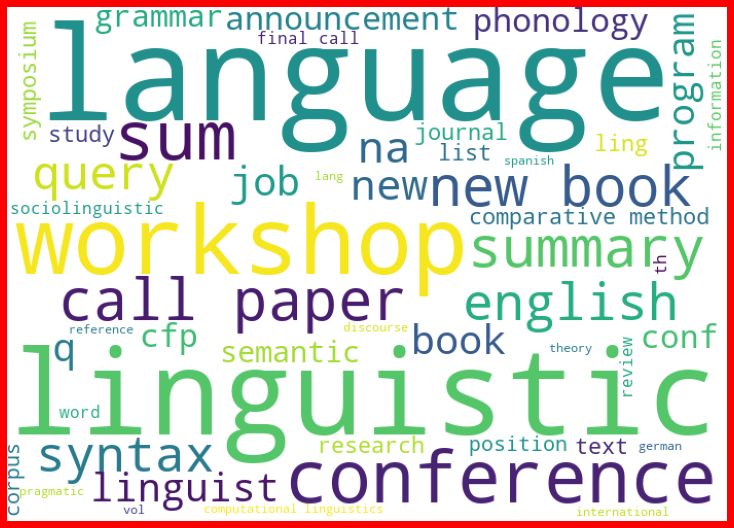

In [16]:
from wordcloud import WordCloud


reviews = df['Cleaned Messages'][df['label']==0]

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

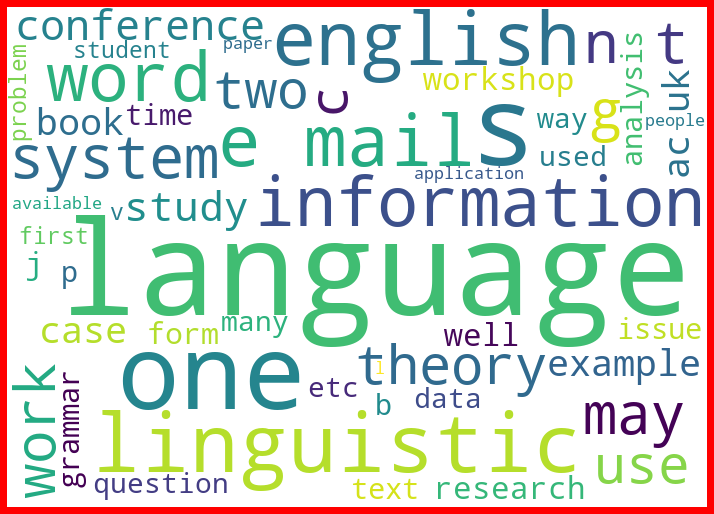

In [17]:
from wordcloud import WordCloud


reviews = df['Cleaned Subjects'][df['label']==0]

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

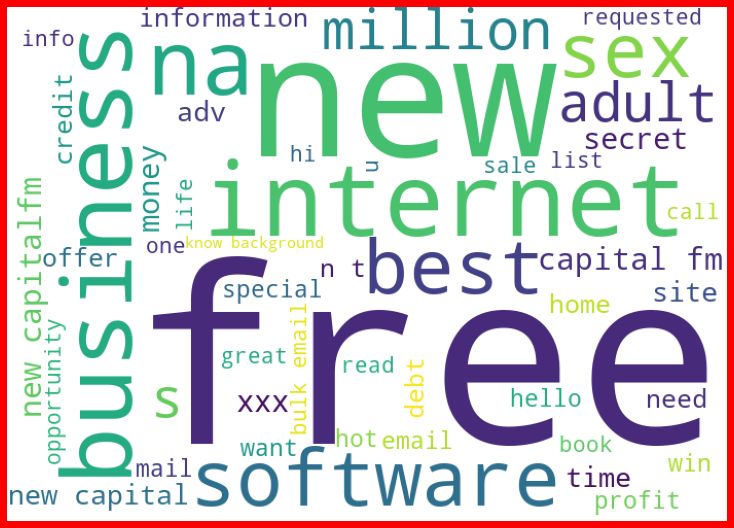

In [18]:
from wordcloud import WordCloud


reviews = df['Cleaned Messages'][df['label']==1]

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

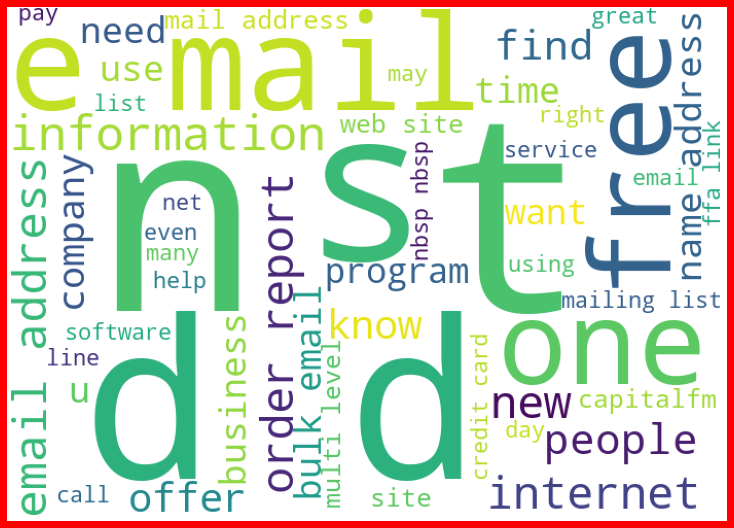

In [19]:
from wordcloud import WordCloud


reviews = df['Cleaned Subjects'][df['label']==1]

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(2, 2))

x = df['Cleaned Messages']
y = df['label']

In [21]:
m = tf.fit_transform(x)
print(m.todense())
print(tf.get_feature_names())
final = pd.DataFrame(m.todense(), columns = tf.get_feature_names())
final

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['aa julius', 'aaai fall', 'aaal colloquium', 'aaal graduate', 'abstract alaa', 'abstract listserve', 'abstract optimality', 'academia sinica', 'academic depts', 'accent allowed', 'accent classroom', 'accent linguistnet', 'accept credit', 'acceptability english', 'accepted paper', 'accessible linguistic', 'accessing linguistic', 'accordo participiale', 'accuracy historical', 'acknowledgment verbal', 'acl association', 'acl august', 'acl coling', 'acl computerm', 'acl corpus', 'acl deadline', 'acl eacl', 'acl participation', 'acl registration', 'acl theme', 'acl workshop', 'acl worshop', 'acm international', 'acm sac', 'acm sigir', 'acoustic signal', 'acq workshop', 'acquiring lexicon', 'acquisition analogy', 'acquisition change', 'acquisition error', 'acquisition foreigner', 'acquisition gala', 'acquisition language', 'acquisition p

,aa julius,aaai fall,aaal colloquium,aaal graduate,abstract alaa,abstract listserve,abstract optimality,academia sinica,academic depts,accent allowed,...,young hot,young researcher,youth gang,youthese pig,yuen ren,yup ik,zellig harris,zero internet,zhou zu,zu mo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
print('The shape of final is {}'.format(final.shape))
print('The shape of y is {}'.format(y.shape))


The shape of final is (2876, 4690)
The shape of y is (2876,)


In [23]:
#Data Balancing using Smote as there was lot of imbalance in the labe;

from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors = 5)
X, Y = oversample.fit_resample(final, y)

**Model Building**

In [24]:
#Deviding the dataset into train and test sets to train and validate the models

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state = 100)

In [25]:
#Training model using Naive bayes Classifier

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha = 2.0)
nb_model = mnb.fit(x_train,y_train)
nb_ypred = nb_model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

---Accuracy Score for Naive Byes---

 0.7192691029900332

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

           0       1.00      0.44      0.61       606
           1       0.64      1.00      0.78       598

    accuracy                           0.72      1204
   macro avg       0.82      0.72      0.70      1204
weighted avg       0.82      0.72      0.70      1204


---ROC AUC SCORE---

 0.7211221122112211


<AxesSubplot:>

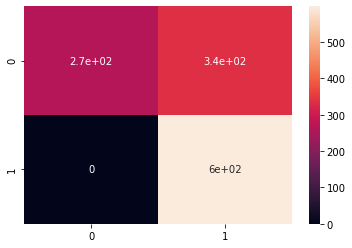

In [27]:
import seaborn as sns
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,nb_ypred))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,nb_ypred))
print('\n---ROC AUC SCORE---\n\n',roc_auc_score(y_test,nb_ypred))
sns.heatmap(confusion_matrix(y_test,nb_ypred), annot = True)

* Using Passive Agressive Classifier

In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(C = 1, random_state = 50)

In [29]:
pac_model = pac.fit(x_train,y_train)
pac_ypred = pac_model.predict(x_test)


---Accuracy Score for Passive Aggressive Classifier---

 0.6877076411960132

---Classification Report for Passive Aggressive Classifier---

               precision    recall  f1-score   support

           0       1.00      0.38      0.55       606
           1       0.61      1.00      0.76       598

    accuracy                           0.69      1204
   macro avg       0.81      0.69      0.66      1204
weighted avg       0.81      0.69      0.65      1204


---ROC AUC SCORE for Passive Aggressive Classifier---

 0.6897689768976898


<AxesSubplot:>

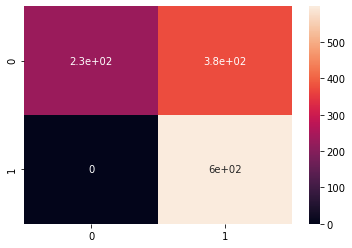

In [30]:
print('\n---Accuracy Score for Passive Aggressive Classifier---\n\n',accuracy_score(y_test,pac_ypred))
print('\n---Classification Report for Passive Aggressive Classifier---\n\n',classification_report(y_test,pac_ypred))
print('\n---ROC AUC SCORE for Passive Aggressive Classifier---\n\n',roc_auc_score(y_test,pac_ypred))
sns.heatmap(confusion_matrix(y_test,pac_ypred), annot = True)

* *Complement Naive Bayes*

In [57]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
train = cnb.fit(x_train,y_train)
test = cnb.predict(x_test)

---Accuracy Score for Naive Byes---

 0.6478405315614618

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

           0       0.69      0.54      0.61       606
           1       0.62      0.76      0.68       598

    accuracy                           0.65      1204
   macro avg       0.66      0.65      0.64      1204
weighted avg       0.66      0.65      0.64      1204



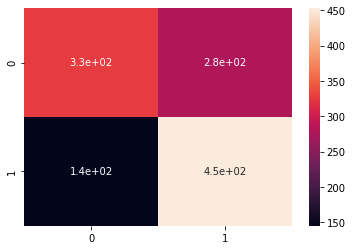

In [58]:
sns.heatmap(confusion_matrix(y_test,test), annot = True)
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,test))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,test))

In [61]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
params = {'alpha': list(np.arange(0.1,3,0.1))}
mnb_grid = GridSearchCV(MultinomialNB(fit_prior = True), param_grid= params, cv = 5, n_jobs=-1)

In [63]:
mnb_grid.fit(x_train,y_train)
print('Best Estimators == > \n',mnb_grid.best_params_)

Best Estimators == > 
 {'alpha': 0.1}


---Accuracy Score for Naive Byes---

 0.7317275747508306

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

           0       1.00      0.47      0.64       606
           1       0.65      1.00      0.79       598

    accuracy                           0.73      1204
   macro avg       0.82      0.73      0.71      1204
weighted avg       0.83      0.73      0.71      1204



<AxesSubplot:>

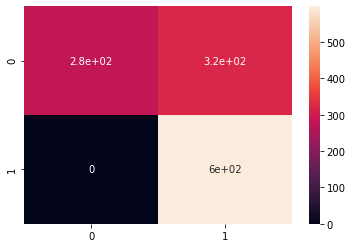

In [64]:
mnb_pred =  mnb_grid.predict(x_test)
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,mnb_pred))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,mnb_pred))
sns.heatmap(confusion_matrix(y_test,mnb_pred), annot = True)

**Model Saving**

In [68]:
import joblib

joblib.dump(mnb_grid, 'Spam.pkl')

['Spam.pkl']